In [1]:
import pandas as pd
import numpy as np
initial_df = pd.read_csv(r'/kaggle/input/gstn-datasets/Train_60 (1)/Train_60/Train_60/X_Train_Data_Input.csv')

In [2]:
# See number of missing values in each column
initial_df.isna().sum()

ID               0
Column0          9
Column1          0
Column2          0
Column3     126303
Column4     127710
Column5     167180
Column6       3850
Column7          0
Column8       3850
Column9     732137
Column10         0
Column11         0
Column12         0
Column13         0
Column14    365703
Column15     16456
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64

In [3]:
#Drop columns with more than 50% missing values
initial_df = initial_df.drop(columns=['Column9', 'Column14'])
for col in initial_df.columns:
    print(col, initial_df[col].nunique())

ID 785133
Column0 19
Column1 2564
Column2 9424
Column3 47
Column4 47
Column5 148334
Column6 157264
Column7 166513
Column8 355728
Column10 2
Column11 2
Column12 2
Column13 2
Column15 66302
Column16 3
Column17 153
Column18 11
Column19 2
Column20 2
Column21 2


## Impute the columns 3 and 4 by training an ML model on other columns

In [4]:
df_nona = initial_df.dropna()

col3= df_nona['Column3']
df_nona_x = df_nona.drop(columns=['ID', 'Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column15'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_nona_x, col3, test_size=0.2, random_state=42)

In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

# One hot encode the target variable
oh= OneHotEncoder()
y_train_encoded = oh.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_test_encoded = oh.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()


# Define the model architecture
col3_imputer = Sequential()

# Input layer
col3_imputer.add(Dense(units=256, activation='relu', input_shape=(X_train.shape[1],)))
col3_imputer.add(BatchNormalization())
col3_imputer.add(Dropout(0.2))

# Hidden layers with Batch Normalization and Dropout
col3_imputer.add(Dense(units=128, activation='relu'))
col3_imputer.add(BatchNormalization())
col3_imputer.add(Dropout(0.2))

col3_imputer.add(Dense(units=64, activation='relu'))
col3_imputer.add(BatchNormalization())
col3_imputer.add(Dropout(0.2))

col3_imputer.add(Dense(units=64, activation='relu'))
col3_imputer.add(BatchNormalization())

col3_imputer.add(Dense(units=47, activation='softmax'))
# Compile the model
col3_imputer.compile(optimizer=Adam(learning_rate=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

history = col3_imputer.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_accuracy = col3_imputer.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict the classes for test data
y_pred = col3_imputer.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# If y_test is one-hot encoded, convert it back to class labels for comparison
y_test_classes = y_test_encoded.argmax(axis=1)

# Evaluate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


I0000 00:00:1727269012.847721      69 service.cc:145] XLA service 0x7e1094007130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727269012.847775      69 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   78/11713 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.3040 - loss: 3.3727      

I0000 00:00:1727269018.748386      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11713/11713 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.6290 - loss: 1.6762 - val_accuracy: 0.6383 - val_loss: 1.6029
Epoch 2/5
11713/11713 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.6375 - loss: 1.6031 - val_accuracy: 0.6383 - val_loss: 1.5868
Epoch 3/5
11713/11713 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.6390 - loss: 1.5954 - val_accuracy: 0.6382 - val_loss: 3.5382
Epoch 4/5
11713/11713 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.6363 - loss: 1.6027 - val_accuracy: 0.6381 - val_loss: 4.6276
Epoch 5/5
11713/11713 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.6382 - loss: 1.5958 - val_accuracy: 0.6382 - val_loss: 1.8358
3661/3661 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6390 - loss: 1.7872
Test Accuracy: 63.79%
3661/3661 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Accuracy: 63.79%


In [6]:
missing_idx = initial_df[initial_df['Column3'].isnull()].index
df_missing_x = initial_df.loc[missing_idx].drop(columns=['ID','Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column15'])

# Predict the missing values
predictions = col3_imputer.predict(df_missing_x)

# Get the predicted class labels (since it's one-hot encoded, take the argmax)
predicted_values = oh.inverse_transform(predictions)

# Impute the missing values in the original dataframe
initial_df.loc[missing_idx, 'Column3'] = predicted_values.ravel()

3947/3947 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


## Imputing Column4

In [7]:
col4= df_nona['Column4']
df_nona_x = df_nona.drop(columns=['ID', 'Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column15'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_nona_x, col4, test_size=0.2, random_state=42)

oh2= OneHotEncoder()

y_train_encoded = oh2.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_test_encoded = oh2.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

col4_imputer = Sequential()

# Input layer
col4_imputer.add(Dense(units=256, activation='relu', input_shape=(X_train.shape[1],)))
col4_imputer.add(BatchNormalization())
col4_imputer.add(Dropout(0.2))

# Hidden layers with Batch Normalization and Dropout
col4_imputer.add(Dense(units=128, activation='relu'))
col4_imputer.add(BatchNormalization())
col4_imputer.add(Dropout(0.2))

col4_imputer.add(Dense(units=64, activation='relu'))
col4_imputer.add(BatchNormalization())
col4_imputer.add(Dropout(0.2))

col4_imputer.add(Dense(units=64, activation='relu'))
col4_imputer.add(BatchNormalization())

col4_imputer.add(Dense(units=47, activation='softmax'))
# Compile the model
col4_imputer.compile(optimizer=Adam(learning_rate=0.005), loss='categorical_crossentropy', metrics=['accuracy'])

history = col4_imputer.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_accuracy = col4_imputer.evaluate(X_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
11713/11713 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.6459 - loss: 1.5515 - val_accuracy: 0.6550 - val_loss: 1.4717
Epoch 2/10
11713/11713 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.6553 - loss: 1.4811 - val_accuracy: 0.6550 - val_loss: 1.4664
Epoch 3/10
11713/11713 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.6541 - loss: 1.4796 - val_accuracy: 0.6550 - val_loss: 3.5535
Epoch 4/10
11713/11713 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.6545 - loss: 1.4812 - val_accuracy: 0.6550 - val_loss: 1.5428
Epoch 5/10
11713/11713 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.6540 - loss: 1.4821 - val_accuracy: 0.6550 - val_loss: 6.7660
Epoch 6/10
11713/11713 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.6539 - loss: 1.4822 - val_accuracy: 0.6549 - val_loss: 3.0545
Epoch 7/10
11713/11713 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.6535 - loss: 1.4807 - val_accuracy: 0.6549 - val_loss: 43.5573
Epoch 8/10
11713/11713 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy:

In [8]:
missing_idx = initial_df[initial_df['Column4'].isnull()].index
df_missing_x = initial_df.loc[missing_idx].drop(columns=['ID','Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column15'])

# Use the trained model to predict missing values
predictions = col4_imputer.predict(df_missing_x)

# Get the predicted class labels (since it's one-hot encoded, take the argmax)
predicted_values = oh2.inverse_transform(predictions)

# Impute the missing values in the original dataframe
initial_df.loc[missing_idx, 'Column4'] = predicted_values.ravel()

3991/3991 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


In [9]:
print(initial_df['Column0'].value_counts()),
print(initial_df['Column5'].value_counts())
print(initial_df['Column6'].value_counts())
print(initial_df['Column8'].value_counts())

Column0
0.0     629558
2.0      73595
1.0      56021
4.0       6296
5.0       6277
6.0       5998
7.0       4156
3.0       1605
9.0        540
8.0        386
11.0       328
12.0       161
15.0        78
14.0        66
13.0        22
10.0        17
16.0        10
18.0         6
17.0         4
Name: count, dtype: int64
Column5
-0.007469    347951
-0.007468     68775
-0.007468       629
-0.007468       385
-0.007468       197
              ...  
-0.007468         1
-0.007468         1
-0.007468         1
-0.007468         1
-0.007467         1
Name: count, Length: 148334, dtype: int64
Column6
-0.407939    561081
 3.440523      2225
 3.440519      1845
 3.440515      1272
 3.440511      1028
              ...  
 2.874645         1
 2.857592         1
 3.299631         1
 0.547727         1
 1.063999         1
Name: count, Length: 157264, dtype: int64
Column8
-0.774979    348274
 0.613549        74
-0.774972        21
-0.059883        11
 0.655212        10
              ...  
 0.790557    

In [10]:
#We can see there that most of the data has the same value, so we can fill the missing values with the mode
for i in [0, 5,6,8,15]:
    initial_df[f'Column{i}'] = initial_df[f'Column{i}'].fillna(initial_df[f'Column{i}'].mode()[0])

In [11]:
df_y = pd.read_csv("/kaggle/input/gstn-datasets/Train_60 (1)/Train_60/Train_60/Y_Train_Data_Target.csv")
merged_df = pd.merge(initial_df, df_y, on='ID', how='inner')

In [12]:
merged_df.isna().sum()

ID          0
Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column10    0
Column11    0
Column12    0
Column13    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
target      0
dtype: int64

In [13]:
merged_df.target.value_counts()

target
0    711100
1     74033
Name: count, dtype: int64

## Since this data is Highly imbalanced, we will use CTGAN to balance the data

In [14]:
!pip install sdv

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 91.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.11.0
    Uninstalling platformdirs-3.11.0:
      Successfully uninstalled platformdirs-3.11.0
  Attempting uninstall: botocore
    Found existing installation: botocore 1.35.16
    Uninstalling botocore-1.35.16:
      Successfully uninstalled botocore-1.35.16
  Attempting

#### !!CAUTION!!
NOTE: The cell below will work ONLY with GPUs(P100, on kaggle notebook)
To run: Uncomment the cells and run the notebook

In [17]:
# This particular cell ONLY works with GPU P100
# from sdv.single_table import CTGANSynthesizer

# synthesizer = CTGANSynthesizer.load(
#     filepath='/kaggle/input/my_synth_2/other/default/1/my_synthesizer_2.pkl'
# )

# majority_class_count = merged_df['target'].value_counts()[0]
# minority_class_count = merged_df['target'].value_counts()[1]
# n_samples = majority_class_count - minority_class_count

In [ ]:
# synthetic_samples = synthesizer.sample(n_samples)
# synthetic_samples['target'] = 1  # Minority class label


In [ ]:
# balanced_df = pd.concat([merged_df, synthetic_samples], ignore_index=True)

# # Shuffle the dataset
# balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

In [ ]:
# balanced_df.to_csv("balanced_df.csv")

## Training the actual model

In [18]:
balanced_df = pd.read_csv(r"/kaggle/input/balanced-df/balanced_df.csv")
balanced_df

,Unnamed: 0,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,...,Column12,Column13,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
0,0,81b15fe71ed23dc0e38d4f35634bfcdc,0.0,483,4119.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,...,1,0,0.00339,0.0,0,0.0,0,0,0,0
1,1,8e962de78f2396c783f4a380d71e8c51,0.0,2457,2532.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,...,1,1,0.00339,0.0,0,0.0,0,0,0,0
2,2,57128450bf951db30c9903b1d1711a6d,0.0,836,6733.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,...,0,0,0.00339,0.0,0,1.0,0,0,0,1
3,3,d5388f587b109e40e05d413cf928e74a,0.0,404,931.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,...,0,0,0.00339,0.0,0,0.0,0,0,0,0
4,4,00001d0c6be410b08944e62296cd601c,0.0,-1,441.0,0.678139,0.701403,-0.007469,-0.407816,-0.015607,...,0,0,0.00339,0.0,1,5.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415128,1415128,00001d0c6be410b08944e62296cd601c,0.0,346,5106.0,-0.224098,-0.150974,-0.007468,-0.407762,-0.015607,...,1,1,0.00339,0.0,0,1.0,0,0,0,1
1415129,1415129,45376d00b8ae64af1237ff0949d2f154,0.0,405,1174.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,...,0,0,0.00339,0.0,0,0.0,0,0,0,0
1415130,1415130,00001d0c6be410b08944e62296cd601c,0.0,280,1187.0,-2.028572,-1.855728,-0.007468,-0.407843,-0.015607,...,0,0,0.00339,0.0,0,1.0,0,0,0,1
1415131,1415131,00001d0c6be410b08944e62296cd601c,0.0,3,1505.0,0.678139,0.701403,-0.007468,-0.395609,-0.015607,...,0,0,0.00339,0.0,0,4.0,0,0,0,1


In [30]:
#Because of downloading the df earlier, a new index column is also added, so
#Removing Unnamed 0
full_train = balanced_df.drop(['ID', 'Unnamed: 0'], axis=1)


In [31]:
full_train

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column10,...,Column12,Column13,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
0,0.0,483,4119.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.163266,0,...,1,0,0.00339,0.0,0,0.0,0,0,0,0
1,0.0,2457,2532.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.258640,1,...,1,1,0.00339,0.0,0,0.0,0,0,0,0
2,0.0,836,6733.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,0,...,0,0,0.00339,0.0,0,1.0,0,0,0,1
3,0.0,404,931.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,-0.774979,0,...,0,0,0.00339,0.0,0,0.0,0,0,0,0
4,0.0,-1,441.0,0.678139,0.701403,-0.007469,-0.407816,-0.015607,-0.774979,0,...,0,0,0.00339,0.0,1,5.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415128,0.0,346,5106.0,-0.224098,-0.150974,-0.007468,-0.407762,-0.015607,1.059539,1,...,1,1,0.00339,0.0,0,1.0,0,0,0,1
1415129,0.0,405,1174.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.606948,0,...,0,0,0.00339,0.0,0,0.0,0,0,0,0
1415130,0.0,280,1187.0,-2.028572,-1.855728,-0.007468,-0.407843,-0.015607,-0.773123,0,...,0,0,0.00339,0.0,0,1.0,0,0,0,1
1415131,0.0,3,1505.0,0.678139,0.701403,-0.007468,-0.395609,-0.015607,-0.774979,0,...,0,0,0.00339,0.0,0,4.0,0,0,0,1


In [32]:
import tensorflow_decision_forests as tfdf
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(full_train, label="target")

In [33]:
model = tfdf.keras.GradientBoostedTreesModel(num_trees=300,
    max_depth=10,
    task=tfdf.keras.Task.CLASSIFICATION
  
)

# Train the model
model.fit(x=train_ds)

Use /tmp/tmpv_znv7u5 as temporary training directory
Reading training dataset...


[WARNING 24-09-25 13:13:03.8130 UTC gradient_boosted_trees.cc:1840] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 24-09-25 13:13:03.8137 UTC gradient_boosted_trees.cc:1851] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 24-09-25 13:13:03.8137 UTC gradient_boosted_trees.cc:1865] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:22.174448. Found 1415133 examples.
Training model...


[INFO 24-09-25 13:31:36.1015 UTC kernel.cc:1233] Loading model from path /tmp/tmpv_znv7u5/model/ with prefix aa1bc7522f184d6f


Model trained in 0:18:10.550922
Compiling model...


[INFO 24-09-25 13:31:36.5532 UTC decision_forest.cc:734] Model loaded with 284 root(s), 133134 node(s), and 20 input feature(s).
[INFO 24-09-25 13:31:36.5532 UTC abstract_model.cc:1362] Engine "GradientBoostedTreesOptPred" built
[INFO 24-09-25 13:31:36.5533 UTC kernel.cc:1061] Use fast generic engine


Model compiled.


In [38]:
model.save("tfdf.pkl")

### Getting the metrics on the train set

In [39]:
preds_f = model.predict(train_ds)
preds_classes = preds_f>0.5

from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
# print(accuracy_score(full_y_train, preds_classes))
print(classification_report(full_y_train, preds_classes))

1416/1416 [==============================] - 29s 20ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    711100
           1       0.98      1.00      0.99    704033

    accuracy                           0.99   1415133
   macro avg       0.99      0.99      0.99   1415133
weighted avg       0.99      0.99      0.99   1415133



## Importing and cleaning the test sets

In [34]:
full_x_test = pd.read_csv(r'/kaggle/input/gstn-datasets/Test_20 (1)/Test_20/Test_20/X_Test_Data_Input.csv')
full_x_test

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,07cf2025382f6325b316e128b1b90999,1.0,1986,53.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.554860,...,1,1,0.001351,0.003390,0.0,0,0.0,0,0,0
1,eb972eb3a1f8d0d1a13f45e7c07d37d4,2.0,1579,12.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.142149,...,1,0,0.001351,0.003390,0.0,0,0.0,0,0,0
2,ee35e164b3ddc25a9f40243b81ad290d,0.0,898,3817.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.003390,0.0,0,0.0,0,0,0
3,28229ccd7bad7dd83324a4175a7e0531,0.0,79,3449.0,-0.675216,-0.577162,-0.007469,0.004020,-0.015607,0.635264,...,0,1,0.001351,0.003390,0.0,0,0.0,0,0,0
4,2f94873da2c332d28f111742818e0fbb,1.0,646,6510.0,-2.028572,-1.855728,NaN,-0.407939,-0.015434,-0.774979,...,1,1,NaN,0.003390,0.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261707,03439d629190be73a4b382325ea46547,2.0,2495,4155.0,-2.028572,0.381762,-0.007468,-0.396521,-0.015607,0.454627,...,1,0,0.001351,0.003391,0.0,0,0.0,0,0,0
261708,10d17d09c22e9c2f77f0667a17b00d0e,0.0,1,1178.0,NaN,NaN,-0.007469,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.003390,0.0,0,0.0,0,0,0
261709,c22938dab5fc0cfae07f3a910f2eb177,0.0,1321,1356.0,0.678139,0.701403,-0.007468,-0.369193,-0.015607,0.912784,...,0,0,0.001351,0.003390,0.0,0,0.0,0,0,0
261710,2bda3964c16fe191fd8735850c454d26,0.0,589,1731.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.003390,0.0,0,0.0,0,0,0


In [35]:
full_x_test.isna().sum()

ID               0
Column0          2
Column1          0
Column2          0
Column3      42234
Column4      42710
Column5      55659
Column6       1234
Column7          0
Column8       1234
Column9     243853
Column10         0
Column11         0
Column12         0
Column13         0
Column14    121679
Column15      5485
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64

In [36]:
full_x_test = full_x_test.drop(columns=['Column9', 'Column14'])

missing_idx_test = full_x_test[full_x_test['Column3'].isnull()].index
df_missing_x_test = full_x_test.loc[missing_idx_test].drop(columns=['ID','Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column15'])
predictions = col3_imputer.predict(df_missing_x_test)
predicted_values = oh.inverse_transform(predictions)
full_x_test.loc[missing_idx_test, 'Column3'] = predicted_values.ravel()

missing_idx_test = full_x_test[full_x_test['Column4'].isnull()].index
df_missing_x_test = full_x_test.loc[missing_idx_test].drop(columns=['ID','Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column15'])
predictions = col4_imputer.predict(df_missing_x_test)
predicted_values = oh2.inverse_transform(predictions)
full_x_test.loc[missing_idx_test, 'Column4'] = predicted_values.ravel()

for i in [0,5,6,8,15]:
    full_x_test[f'Column{i}'] = full_x_test[f'Column{i}'].fillna(full_x_test[f'Column{i}'].mode()[0])


1320/1320 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [40]:
full_test = pd.merge(full_x_test, pd.read_csv(r"/kaggle/input/gstn-datasets/Test_20 (1)/Test_20/Test_20/Y_Test_Data_Target.csv"), on='ID', how='inner')

In [42]:
full_test.isna().sum()

ID          0
Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column10    0
Column11    0
Column12    0
Column13    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
target      0
dtype: int64

In [43]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(full_test, label="target")

In [53]:
preds_f = model.predict(test_ds)
preds_classes_test = preds_f>0.5

from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
# print(accuracy(full_test['target'], preds_classes))
print(classification_report(full_test['target'], preds_classes_test))

262/262 [==============================] - 5s 18ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.83      0.95      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.97      0.94    261712
weighted avg       0.98      0.98      0.98    261712



In [59]:
print("Precision : ", precision_score(full_test['target'], preds_classes_test))
print("Recall : ", recall_score(full_test['target'], preds_classes_test))
print("F1 : ", f1_score(full_test['target'], preds_classes_test))
print("Accuracy : ", accuracy_score(full_test['target'], preds_classes_test))

Precision :  0.8277586085486938
Recall :  0.9526703946835238
F1 :  0.8858327053504146
Accuracy :  0.9768447759369078


AUC-ROC: 0.97


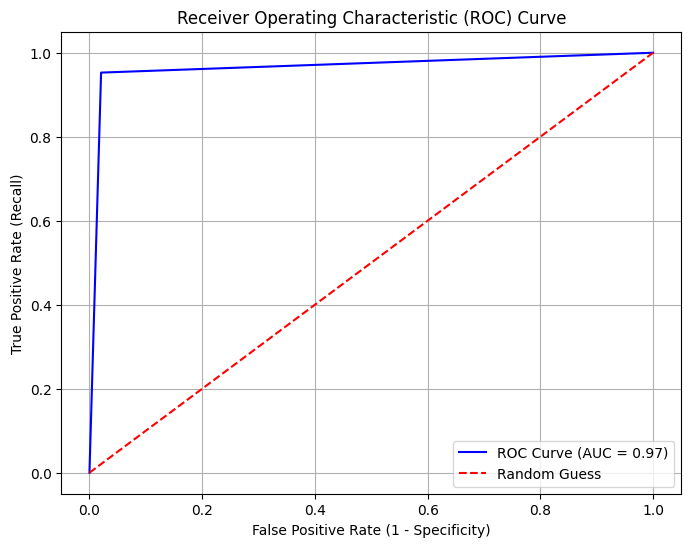

In [55]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(full_test['target'], preds_classes_test)

auc = roc_auc_score(full_test['target'], preds_classes_test)
print(f"AUC-ROC: {auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

Confusion Matrix:
[[232142   4892]
 [  1168  23510]]


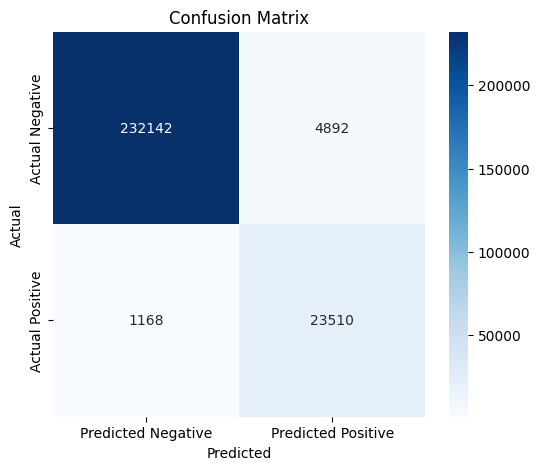

In [56]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute Confusion Matrix
cm = confusion_matrix(full_test['target'], preds_classes_test)
print("Confusion Matrix:")
print(cm)

# Visualize Confusion Matrix
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [57]:
from sklearn.metrics import balanced_accuracy_score

# Compute Balanced Accuracy
balanced_acc = balanced_accuracy_score(full_test['target'], preds_classes_test)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

Balanced Accuracy: 0.97


In [58]:
from sklearn.metrics import log_loss

loss = log_loss(full_test['target'], preds_f)

print(f"Log Loss: {loss}")


Log Loss: 0.05532251137142887
